<a href="https://colab.research.google.com/github/gauravjha201/Deep_Learning_basics/blob/main/DL__3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [6]:
x_test.shape

(10000, 32, 32, 3)

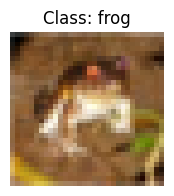

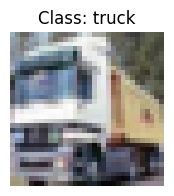

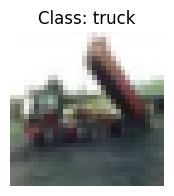

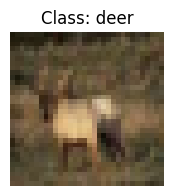

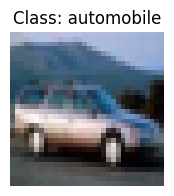

In [3]:
import matplotlib.pyplot as plt

cifar10_class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def show_image(index):
    if index < 0 or index >= len(x_train):
        raise ValueError(f"Index must be between 0 and {len(x_train)-1}")

    image = x_train[index]
    label = y_train[index][0]
    class_name = cifar10_class_names[label]

    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.title(f"Class: {class_name}")
    plt.axis('off')
    plt.show()

show_image(0)
show_image(1)
show_image(2)
show_image(3)
show_image(4)

In [7]:
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

data_gen=ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
data_gen.fit(x_train)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout

model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512,activation='relu'),
    Dropout(0.3),
    Dense(256,activation='relu'),
    Dropout(0.3),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [9]:
history=model.fit(data_gen.flow(x_train,y_train,batch_size=64),
                  epochs=10,
                  validation_data=(x_test,y_test),
                  verbose=1
                  )



Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 80ms/step - accuracy: 0.1934 - loss: 2.1723 - val_accuracy: 0.3182 - val_loss: 1.8803
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 65s 84ms/step - accuracy: 0.2579 - loss: 1.9838 - val_accuracy: 0.3237 - val_loss: 1.8727
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 75ms/step - accuracy: 0.2820 - loss: 1.9403 - val_accuracy: 0.3482 - val_loss: 1.8319
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.2909 - loss: 1.9152 - val_accuracy: 0.3519 - val_loss: 1.8039
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.2960 - loss: 1.9014 - val_accuracy: 0.3438 - val_loss: 1.8146
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.3029 - loss: 1.8878 - val_accuracy: 0.3650 - val_loss: 1.7868
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.3073 - loss: 1.8783 - val_accuracy: 0.3929 - val_loss: 1.7530
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 66ms/step - accuracy: 0.3167 - loss: 1.8699 - val_accurac

In [10]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test Accuracy",test_acc)
print("Test Loss",test_loss)



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3750 - loss: 1.7301
Test Accuracy 0.3677000105381012
Test Loss 1.7318607568740845


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


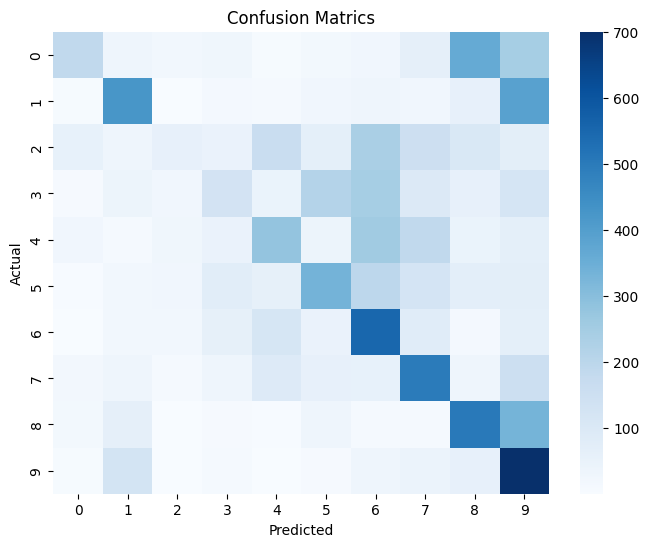

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred=np.argmax(model.predict(x_test),axis=1)
y_true=np.argmax(y_test,axis=1)

cm=confusion_matrix(y_true,y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=False,cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrics")
plt.show()


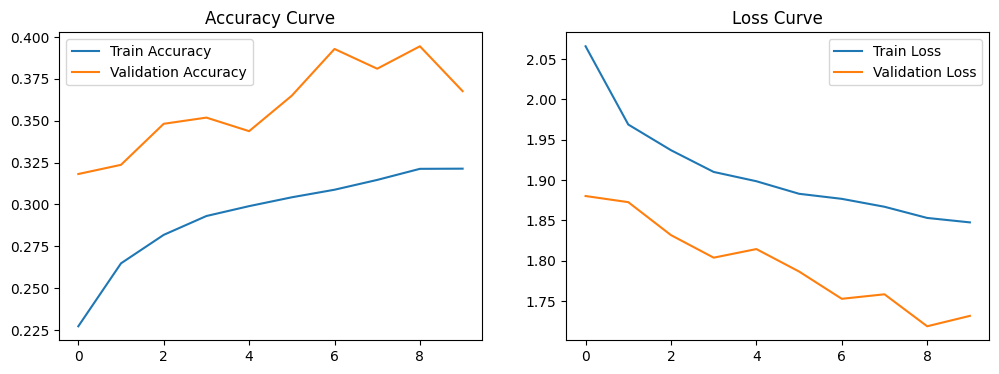

In [12]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Curve")

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.title("Loss Curve")

plt.show()


In [5]:
!pip install scikeras

In [1]:
!pip install -U scikeras tensorflow scikit-learn


In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [9]:
def build_model(learning_rate=0.001, dropout_rate=0.3):
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(512, activation='relu'),
        Dropout(dropout_rate),
        Dense(256, activation='relu'),
        Dropout(dropout_rate),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [10]:
model = KerasClassifier(
    model=build_model,
    epochs=5,
    batch_size=64,
    verbose=0
)


In [11]:
param_grid = {
    "model__learning_rate": [0.001, 0.0005],
    "model__dropout_rate": [0.3, 0.5],
    "batch_size": [32, 64]
}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3
)

grid_result = grid.fit(x_train, y_train)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `inpu

In [12]:
print("Best Accuracy:", grid_result.best_score_)
print("Best Parameters:", grid_result.best_params_)


Best Accuracy: 0.3879996803040058
Best Parameters: {'batch_size': 64, 'model__dropout_rate': 0.3, 'model__learning_rate': 0.0005}


In [15]:
param_dist = {
    'model__learning_rate': [0.01, 0.001, 0.0005, 0.0001],
    'model__dropout_rate': [0.2, 0.3, 0.4, 0.5],
    'batch_size': [32, 64, 128],
    'epochs': [5, 10]
}

In [16]:
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    n_jobs=1
)

random_result = random_search.fit(x_train, y_train)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `inpu

In [17]:
print("Best Accuracy:", random_result.best_score_)
print("Best Parameters:", random_result.best_params_)


Best Accuracy: 0.4499199047580311
Best Parameters: {'model__learning_rate': 0.0001, 'model__dropout_rate': 0.3, 'epochs': 10, 'batch_size': 32}


CIFAR-10 is a standard image classification dataset containing 60,000 images across 10 classes.and we perform
Normalization to [0,1]
One-hot encoding for dependent data
Data augmentation for better generalization
than We perfrom model traning with ANN with 3 Hidden Layers and ReLU activation funtion and Softmax activation funtion with output layer and we use Adam Optimizer and for Loss we use categorical cross entropy with 64 batch size with 20 Epochs. and In Confusion Matrics , Strong diagonal values indicate correct predictions, while off-diagonal elements represent misclassifications and The training and validation curves show that the ANN model learns effectively with stable convergence. The absence of overfitting and the smooth decrease in loss indicate proper regularization and an appropriate learning rate.
And with ANN model (Test Accuracy is 0.3677000105381012 and
Test Loss is 1.7318607568740845),and with hyperparameter GridSearchCV (Best Accuracy: 0.3879996803040058,
Best Parameters: {'batch_size': 64, 'model__dropout_rate': 0.3, 'model__learning_rate': 0.0005}) and hyperparameter RandomSearchCV (Best Accuracy: 0.4499199047580311,
Best Parameters: {'model__learning_rate': 0.0001, 'model__dropout_rate': 0.3, 'epochs': 10, 'batch_size': 32})

